In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Read the dataset to python environment

In [3]:
dataset = pd.read_excel("iris.xls")

In [4]:
dataset

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Do necessary pre-processing steps

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Now let us see how are the length and width are distributed

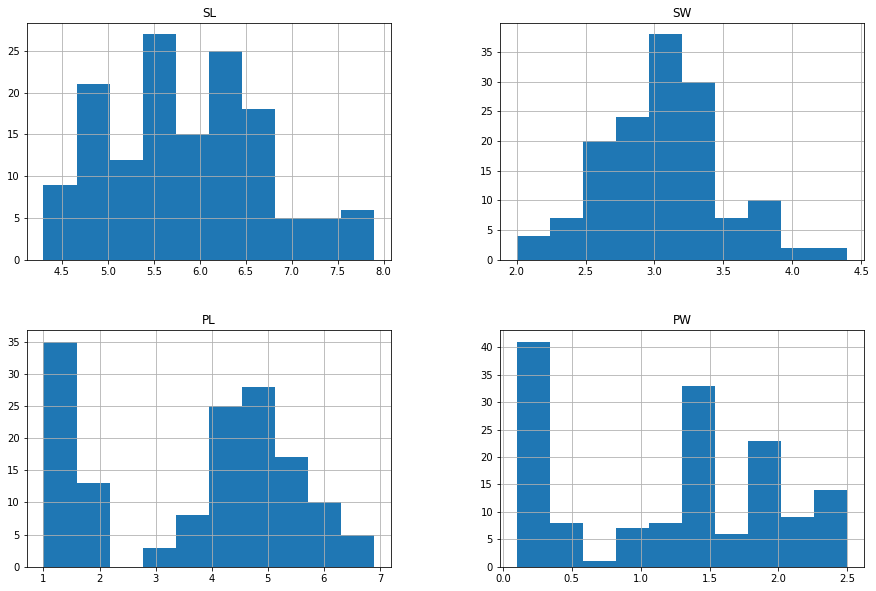

In [15]:
hist_graph=dataset.select_dtypes(include=['int64','float'])
#Plotting histogram
hist_graph.hist(figsize=(15,10))
plt.show()

In [ ]:
#We can check the null values using isnull() or isna() and we can use sum() for getting the sum of null values

In [16]:
dataset.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

We can see that each SL,SW and PL columns contains 7,6 and 6 null values

In [17]:
#Handling missing values in SL column

In [18]:
dataset['SL']=dataset['SL'].fillna(dataset['SL'].median())

In [19]:
dataset['SW']=dataset['SW'].fillna(dataset['SW'].median())

In [20]:
dataset['PL']=dataset['PL'].fillna(dataset['PL'].median())

In [21]:
dataset

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [22]:
#Checking the null values again

In [23]:
dataset.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [24]:
#Check and handle outliers

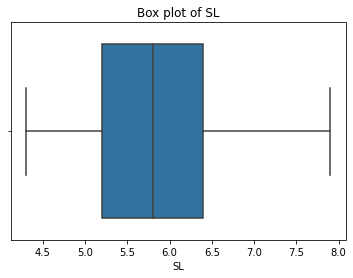

In [25]:
sns.boxplot(dataset['SL'])
plt.title('Box plot of SL')
plt.show()

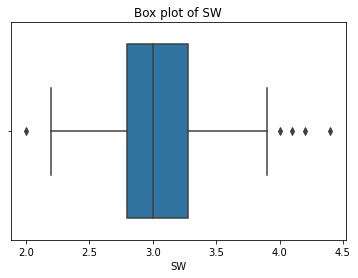

In [26]:
sns.boxplot(dataset['SW'])
plt.title('Box plot of SW')
plt.show()

In [27]:
#There is some outlier in SW column

In [28]:
Q1=np.percentile(dataset["SW"],25,interpolation="midpoint")
Q2=np.percentile(dataset["SW"],50,interpolation="midpoint")
Q3=np.percentile(dataset["SW"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in dataset["SW"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)   

In [30]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [31]:
low_data=dataset["SW"]<low_lim
dataset.loc[low_data].index

Int64Index([60], dtype='int64')

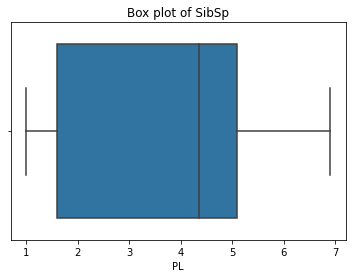

In [32]:
sns.boxplot(dataset['PL'])
plt.title('Box plot of PL')
plt.show()

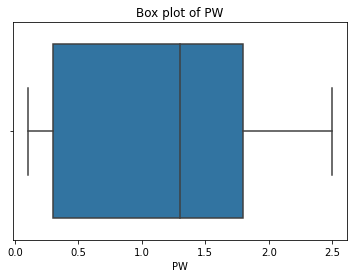

In [34]:
sns.boxplot(dataset['PW'])
plt.title('Box plot of PW')
plt.show()

In [35]:
#Calculate min max scaling

In [36]:
from sklearn import preprocessing

In [37]:
x = np.array([[-400],
              [-100],
              [0],
              [100],
              [400]])
minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [38]:
x_scaler = minmaxscaler.fit_transform(x)

In [39]:
x_scaler

array([[0.   ],
       [0.375],
       [0.5  ],
       [0.625],
       [1.   ]])

In [40]:
 x1 = np.array([[1,2,3],
               [4,5,6],
               [7,8,9]])
minmaxscaler1 = preprocessing.MinMaxScaler(feature_range=(0,1))

In [41]:
x_scaler1 = minmaxscaler1.fit_transform(x1)
x_scaler1

array([[0. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [1. , 1. , 1. ]])

In [42]:
dataset.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
features = dataset.iloc[:,[1]].values

In [44]:
minmaxscaler_as = preprocessing.MinMaxScaler(feature_range=(0,2)) 

In [66]:
features_scale = minmaxscaler_as.fit_transform(features)

In [67]:
features_scale

array([[1.25      ],
       [0.83333333],
       [1.        ],
       [0.91666667],
       [1.33333333],
       [1.58333333],
       [1.16666667],
       [1.16666667],
       [0.75      ],
       [0.91666667],
       [0.83333333],
       [1.16666667],
       [0.83333333],
       [0.83333333],
       [1.66666667],
       [2.        ],
       [1.58333333],
       [1.25      ],
       [1.5       ],
       [1.5       ],
       [1.16666667],
       [1.41666667],
       [1.33333333],
       [1.08333333],
       [1.16666667],
       [0.83333333],
       [1.16666667],
       [0.83333333],
       [1.16666667],
       [1.        ],
       [0.91666667],
       [1.16666667],
       [1.75      ],
       [1.83333333],
       [0.91666667],
       [1.        ],
       [1.25      ],
       [0.91666667],
       [0.83333333],
       [1.16666667],
       [1.25      ],
       [0.25      ],
       [1.        ],
       [0.83333333],
       [1.5       ],
       [0.83333333],
       [1.5       ],
       [1.   